<a href="https://colab.research.google.com/github/yucucan/DSA-210-Term-Project/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from os.path import join
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for file I/O
path_prefix = "/content/drive/My Drive/Colab/DSA 210/Project/Data"

Mounted at /content/drive


In [57]:
import os
print(len(os.listdir(path_prefix)))  # path_prefix as you provided

56


In [58]:
worldbank_fname_list_csv = os.listdir(path_prefix)
worldbank_fname_list = [item[:-4] if item.endswith(".csv") else item for item in  os.listdir(path_prefix)]

exceptions_2015 = ["Renewable electricity output (% of total electricity output).csv",]
exceptions_2014 = ["Electric power consumption (kWh per capita).csv"]
len(worldbank_fname_list_csv), len(worldbank_fname_list)

(56, 56)

In [59]:
n = os.listdir(path_prefix)
for item in n:
  if item not in worldbank_fname_list_csv:
    print(item)

In [60]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [149]:
### Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# Data Preprocessing
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Gathering Data

In [62]:
!kaggle datasets download -d mathurinache/world-happiness-report

!unzip "world-happiness-report.zip"

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [63]:
!kaggle datasets download -d azathoth42/myanimelist

!unzip "myanimelist.zip"

Dataset URL: https://www.kaggle.com/datasets/azathoth42/myanimelist
License(s): DbCL-1.0
Archive:  myanimelist.zip
  inflating: AnimeList.csv           
  inflating: UserAnimeList.csv       
  inflating: UserList.csv            
  inflating: anime_cleaned.csv       
  inflating: anime_filtered.csv      
  inflating: animelists_cleaned.csv  
  inflating: animelists_filtered.csv  
  inflating: users_cleaned.csv       
  inflating: users_filtered.csv      


# Data Preprocessing

In [96]:
df = pd.read_csv('2016.csv')
df.sort_values(by='Country', ascending=True, inplace=True)
df = df[df["Country"] != "Kosovo"]
df.reset_index(drop=True, inplace=True)
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()
df

Country                           Region  Happiness Rank  \
0    afghanistan                    Southern Asia             154   
1        albania       Central and Eastern Europe             109   
2        algeria  Middle East and Northern Africa              38   
3         angola               Sub-Saharan Africa             141   
4      argentina      Latin America and Caribbean              26   
..           ...                              ...             ...   
151    venezuela      Latin America and Caribbean              44   
152      vietnam                Southeastern Asia              96   
153        yemen  Middle East and Northern Africa             147   
154       zambia               Sub-Saharan Africa             106   
155     zimbabwe               Sub-Saharan Africa             131   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              3.360                      3.288                      3.432   
1              4.655                      4.546                      4.764   
2              6.355                      6.227                      6.483   
3              3.866                      3.753                      3.979   
4              6.650                      6.560                      6.740   
..               ...                        ...                        ...   
151            6.084                      5.973                      6.195   
152            5.061                      4.991                      5.131   
153            3.724                      3.621                      3.827   
154            4.795                      4.645                      4.945   
155            4.193                      4.101                      4.285   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     0.38227  0.11037                   0.17344  0.16430   
1                     0.95530  0.50163                   0.73007  0.31866   
2                     1.05266  0.83309                   0.61804  0.21006   
3                     0.84731  0.66366                   0.04991  0.00589   
4                     1.15137  1.06612                   0.69711  0.42284   
..                        ...      ...                       ...      ...   
151                   1.13367  1.03302                   0.61904  0.19847   
152                   0.74037  0.79117                   0.66157  0.55954   
153                   0.57939  0.47493                   0.31048  0.22870   
154                   0.61202  0.63760                   0.23573  0.42662   
155                   0.35041  0.71478                   0.15950  0.25429   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.07112     0.31268            2.14558  
1                          0.05301     0.16840            1.92816  
2                          0.16157     0.07044            3.40904  
3                          0.08434     0.12071            2.09459  
4                          0.07296     0.10989            3.12985  
..                             ...         ...                ...  
151                        0.08304     0.04250            2.97468  
152                        0.11556     0.25075            1.94180  
153                        0.05892     0.09821            1.97295  
154                        0.11479     0.17866            2.58991  
155                        0.08582     0.18503            2.44270  

[156 rows x 13 columns]

In [97]:
rows_to_skip = 4
for i in range (len(worldbank_fname_list_csv)):
  fname = worldbank_fname_list_csv[i]
  df_world_bank = pd.read_csv(join(path_prefix, fname), skiprows=rows_to_skip, sep=',', on_bad_lines='skip')

  if 'Country Name' in df_world_bank.columns:
    df_world_bank['Country Name'] = df_world_bank['Country Name'].str.lower().str.strip()
  else:
    print(f"Warning: 'Country Name' column not found in {fname}")
    continue

  df_tmp = df[['Country']].copy()
  if fname in exceptions_2015:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2015']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2015']
  elif fname in exceptions_2014:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2014']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2014']
  else:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2016']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2016']
df

Country                           Region  Happiness Rank  \
0    afghanistan                    Southern Asia             154   
1        albania       Central and Eastern Europe             109   
2        algeria  Middle East and Northern Africa              38   
3         angola               Sub-Saharan Africa             141   
4      argentina      Latin America and Caribbean              26   
..           ...                              ...             ...   
151    venezuela      Latin America and Caribbean              44   
152      vietnam                Southeastern Asia              96   
153        yemen  Middle East and Northern Africa             147   
154       zambia               Sub-Saharan Africa             106   
155     zimbabwe               Sub-Saharan Africa             131   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              3.360                      3.288                      3.432   
1              4.655                      4.546                      4.764   
2              6.355                      6.227                      6.483   
3              3.866                      3.753                      3.979   
4              6.650                      6.560                      6.740   
..               ...                        ...                        ...   
151            6.084                      5.973                      6.195   
152            5.061                      4.991                      5.131   
153            3.724                      3.621                      3.827   
154            4.795                      4.645                      4.945   
155            4.193                      4.101                      4.285   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     0.38227  0.11037                   0.17344  0.16430   
1                     0.95530  0.50163                   0.73007  0.31866   
2                     1.05266  0.83309                   0.61804  0.21006   
3                     0.84731  0.66366                   0.04991  0.00589   
4                     1.15137  1.06612                   0.69711  0.42284   
..                        ...      ...                       ...      ...   
151                   1.13367  1.03302                   0.61904  0.19847   
152                   0.74037  0.79117                   0.66157  0.55954   
153                   0.57939  0.47493                   0.31048  0.22870   
154                   0.61202  0.63760                   0.23573  0.42662   
155                   0.35041  0.71478                   0.15950  0.25429   

     ...  \
0    ...   
1    ...   
2    ...   
3    ...   
4    ...   
..   ...   
151  ...   
152  ...   
153  ...   
154  ...   
155  ...   

     Contraceptive prevalence, any method (% of married women ages 15-49)  \
0                                                 22.5                      
1                                                  NaN                      
2                                                  NaN                      
3                                                 13.7                      
4                                                  NaN                      
..                                                 ...                      
151                                                NaN                      
152                                                NaN                      
153                                                NaN                      
154                                                NaN                      
155                                                NaN                      

     Life expectancy at birth, female (years)  \
0                                      65.096   
1                                      81.377   
2                                      76.803   
3                                      63.434   
4  

In [98]:
df_world_bank.head(5)

SA_0000001747  \
0  SA_0000001747   
1  SA_0000001747   
2  SA_0000001747   
3  SA_0000001747   
4  SA_0000001747   

  Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol), three-year average  \
0  Alcohol, recorded per capita (15+) consumption...                                               
1  Alcohol, recorded per capita (15+) consumption...                                               
2  Alcohol, recorded per capita (15+) consumption...                                               
3  Alcohol, recorded per capita (15+) consumption...                                               
4  Alcohol, recorded per capita (15+) consumption...                                               

   numeric  EMR  Eastern Mediterranean  Country  SOM      Somalia  Year  2020  \
0  numeric  EMR  Eastern Mediterranean  Country  AFG  Afghanistan  Year  2020   
1  numeric  EMR  Eastern Mediterranean  Country  LBY        Libya  Year  2020   
2  numeric  EMR  Eastern Mediterranean  Country  SDN        Sudan  Year  2020   
3  numeric  EMR  Eastern Mediterranean  Country  PAK     Pakistan  Year  2020   
4  numeric  EMR  Eastern Mediterranean  Country  YEM        Yemen  Year  2020   

   ...  Unnamed: 24  Unnamed: 25  0.1  Unnamed: 27    0.2  0.0 [0.0 - 0.0]  \
0  ...          NaN          NaN  0.0          NaN  0.087  0.0 [0.0 - 0.1]   
1  ...          NaN          NaN  0.0          NaN  0.096  0.0 [0.0 - 0.1]   
2  ...          NaN          NaN  0.0          NaN  0.078  0.0 [0.0 - 0.1]   
3  ...          NaN          NaN  0.0          NaN  0.240  0.0 [0.0 - 0.2]   
4  ...          NaN          NaN  0.0          NaN  0.180  0.0 [0.0 - 0.2]   

   Unnamed: 30  Data is for 2020 only; it is not a three-year average.  EN  \
0          NaN  Data is for 2020 only; it is not a three-year ...       EN   
1          NaN  Data is for 2020 only; it is not a three-year ...       EN   
2          NaN  Data is for 2020 only; it is not a three-year ...       EN   
3          NaN  Data is for 2020 only; it is not a three-year ...       EN   
4          NaN  Data is for 2020 only; it is not a three-year ...       EN   

   2024-06-20T21:00:00.000Z  
0  2024-06-20T21:00:00.000Z  
1  2024-06-20T21:00:00.000Z  
2  2024-06-20T21:00:00.000Z  
3  2024-06-20T21:00:00.000Z  
4  2024-06-20T21:00:00.000Z  

[5 rows x 34 columns]

In [99]:
for col in df.columns:
    if df[col].isnull().any():
        nan_sum = df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")
        if nan_sum > 50:
          df.drop(columns=[col], inplace=True)
          print(f"Column '{col}' has been dropped.")

Column 'High-technology exports (current US$)' has 36 NaN values.
Column 'Forest area (% of land area)' has 22 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 37 NaN values.
Column 'GDP per capita growth (annual %)' has 23 NaN values.
Column 'Urban population (% of total population)' has 22 NaN values.
Column 'Net migration' has 22 NaN values.
Column 'GNI per capita, PPP (current international $)' has 23 NaN values.
Column 'Exports of goods and services (% of GDP)' has 30 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 24 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has 123 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has been dropped.
Column 'Access to electricity (% of population)' has 22 NaN values.
Column 'Population growth (annual %)' has 22 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 22 NaN values.
Colum

In [100]:
df

Country                           Region  Happiness Rank  \
0    afghanistan                    Southern Asia             154   
1        albania       Central and Eastern Europe             109   
2        algeria  Middle East and Northern Africa              38   
3         angola               Sub-Saharan Africa             141   
4      argentina      Latin America and Caribbean              26   
..           ...                              ...             ...   
151    venezuela      Latin America and Caribbean              44   
152      vietnam                Southeastern Asia              96   
153        yemen  Middle East and Northern Africa             147   
154       zambia               Sub-Saharan Africa             106   
155     zimbabwe               Sub-Saharan Africa             131   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              3.360                      3.288                      3.432   
1              4.655                      4.546                      4.764   
2              6.355                      6.227                      6.483   
3              3.866                      3.753                      3.979   
4              6.650                      6.560                      6.740   
..               ...                        ...                        ...   
151            6.084                      5.973                      6.195   
152            5.061                      4.991                      5.131   
153            3.724                      3.621                      3.827   
154            4.795                      4.645                      4.945   
155            4.193                      4.101                      4.285   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     0.38227  0.11037                   0.17344  0.16430   
1                     0.95530  0.50163                   0.73007  0.31866   
2                     1.05266  0.83309                   0.61804  0.21006   
3                     0.84731  0.66366                   0.04991  0.00589   
4                     1.15137  1.06612                   0.69711  0.42284   
..                        ...      ...                       ...      ...   
151                   1.13367  1.03302                   0.61904  0.19847   
152                   0.74037  0.79117                   0.66157  0.55954   
153                   0.57939  0.47493                   0.31048  0.22870   
154                   0.61202  0.63760                   0.23573  0.42662   
155                   0.35041  0.71478                   0.15950  0.25429   

     ...  Refugee population by country or territory of asylum  \
0    ...                                            59770.0      
1    ...                                              141.0      
2    ...                                            94220.0      
3    ...                                            15547.0      
4    ...                                             3267.0      
..   ...                                                ...      
151  ...                                                NaN      
152  ...                                                NaN      
153  ...                                                NaN      
154  ...                                            29338.0      
155  ...                                             7423.0      

     Life expectancy at birth, male (years)  \
0                                    61.193   
1                                    76.639   
2                                    74.693   
3                                    58.741   
4                                    72.933   
..                                      ...   
151                                     NaN   
152                                     NaN   
153                                     NaN   
154                                  59.349   
155     

In [101]:
country_list = df['Country'].tolist()

In [102]:
import datetime

users = pd.read_csv('users_cleaned.csv')
users['join_date'] = pd.to_datetime(users['join_date'])
users['last_online'] = pd.to_datetime(users['last_online'])
users['birth_date'] = pd.to_datetime(users['birth_date'])
now = datetime.datetime.now()
users['age'] = (now - users['birth_date']).dt.days / 365.25
users['age'] = users['age'].astype(int)
users

username  user_id  user_watching  user_completed  user_onhold  \
0             karthiga  2255153              3              49            1   
1            Damonashu    37326             45             195           27   
2                bskai   228342             25             414            2   
3       terune_uzumaki   327311              5               5            0   
4                Bas_G  5015094             35             114            6   
...                ...      ...            ...             ...          ...   
108706          isoann   797785             14             213           11   
108707        bumcakee  1396285             13             116            5   
108708       Scarlet95  2478991              6             103           10   
108709        Torasori  3975907             22             239            0   
108710          HMicca  1289601             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  access_rank  join_date  \
0              Chennai, India  1990-04-29          NaN 2013-03-03   
1             Detroit,Michigan 1991-08-01          NaN 2008-02-13   
2              Nayarit, Mexico 1990-12-14          NaN 2009-08-31   
3            Malaysia, Kuantan 1998-08-24          NaN 2010-05-10   
4          Nijmegen, Nederland 1999-10-24          NaN 2015-11-26   
...                        ...        ...          ...        ...   
108706                 Poland: 1997-01-13          NaN 2011-10-23   
108707  nhollywood, california 1998-07-18          NaN 2012-07-14   
108708                 Belgium 1995-10-17          NaN 2013-04-24   
108709            Latvia, Riga 1998-11-18          NaN 2014-07-30   
108710     Birmingham, England 1995-08-12          NaN 2012-05-05   

               last_online  stats_mean_score  stats_rewatched  stats_episodes  \
0      2014-02-04 01:32:00              7.43              0.0            3391   
1      2017-07-10 06:52:54              6.15              6.0            4903   
2      2014-05-12 16:35:00              8.27              1.0            9701   
3      2012-10-18 19:06:00              9.70              6.0             697   
4      2018-05-10 20:53:37              7.86              0.0            1847   
...                    ...               ...              ...             ...   
108706 2018-02-25 01:20:27              8.03              2.0            3939   
108707 2017-02-14 00:30:00              8.86             24.0            2537   
108708 2016-12-18 08:41:00              7.40              1.0            2869   
108709 2018-05-24 21:34:46              8.98             47.0            4469   
108710 2012-11-15 08:10:00              8.89             11.0            3822   

        age  
0        34  
1        33  
2        34  
3        26  
4        25  
...     ...  
108706   28  
108707   26  
108708   29  
108709   26  
108710   29  

[108711 rows x 18 columns]

In [103]:
if 'access_rank' in users.columns:
    users = users.drop(columns=['access_rank'])
    print("Column 'access_rank' dropped successfully from users.")
else:
    print("Column 'access_rank' not found in users.")

if 'user_id' in users.columns:
    users = users.drop(columns=['user_id'])
    print("Column 'user_id' dropped successfully from users.")
else:
    print("Column 'user_id' not found in users.")

Column 'access_rank' dropped successfully from users.
Column 'user_id' dropped successfully from users.


In [104]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]
us_states_lower = [state.lower() for state in us_states]

In [105]:
def find_country(input):
  input = str(input)
  if input == 'nan':
    return 'Other'
  else:
    for country in country_list:
      if country in input.lower():
        return country
    for state in us_states_lower:
      if state in input.lower():
        return 'united states'
    return 'Other'

In [106]:
users['Country'] = users['location'].apply(find_country)
users

username  user_watching  user_completed  user_onhold  \
0             karthiga              3              49            1   
1            Damonashu             45             195           27   
2                bskai             25             414            2   
3       terune_uzumaki              5               5            0   
4                Bas_G             35             114            6   
...                ...            ...             ...          ...   
108706          isoann             14             213           11   
108707        bumcakee             13             116            5   
108708       Scarlet95              6             103           10   
108709        Torasori             22             239            0   
108710          HMicca             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  join_date         last_online  \
0              Chennai, India  1990-04-29 2013-03-03 2014-02-04 01:32:00   
1             Detroit,Michigan 1991-08-01 2008-02-13 2017-07-10 06:52:54   
2              Nayarit, Mexico 1990-12-14 2009-08-31 2014-05-12 16:35:00   
3            Malaysia, Kuantan 1998-08-24 2010-05-10 2012-10-18 19:06:00   
4          Nijmegen, Nederland 1999-10-24 2015-11-26 2018-05-10 20:53:37   
...                        ...        ...        ...                 ...   
108706                 Poland: 1997-01-13 2011-10-23 2018-02-25 01:20:27   
108707  nhollywood, california 1998-07-18 2012-07-14 2017-02-14 00:30:00   
108708                 Belgium 1995-10-17 2013-04-24 2016-12-18 08:41:00   
108709            Latvia, Riga 1998-11-18 2014-07-30 2018-05-24 21:34:46   
108710     Birmingham, England 1995-08-12 2012-05-05 2012-11-15 08:10:00   

        stats_mean_score  stats_rewatched  stats_episodes  age        Country  
0                   7.43              0.0            3391   34          india  
1                   6.15              6.0            4903   33  united states  
2                   8.27              1.0            9701   34         mexico  
3                   9.70              6.0             697   26       malaysia  
4                   7.86              0.0            1847   25          Other  
...                  ...              ...             ...  ...            ...  
108706              8.03              2.0            3939   28         poland  
108707              8.86             24.0            2537   26  united states  
108708              7.40              1.0            2869   29        belgium  
108709              8.98             47.0            4469   26         latvia  
108710              8.89             11.0            3822   29          Other  

[108711 rows x 17 columns]

In [107]:
if 'location' in users.columns:
    users = users.drop(columns=['location'])
    print("Column 'location' dropped successfully from users.")
else:
    print("Column 'location' not found in users.")

Column 'location' dropped successfully from users.


In [108]:
other_count = users[users['Country'] == 'Other'].shape[0]
print(f"Number of 'Other' values in the 'Country' column: {other_count}")

Number of 'Other' values in the 'Country' column: 40555


In [109]:
users = users[users['Country'] != 'Other']
users.reset_index(drop=True, inplace=True)
users

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
68151       ZeroFr3aK             36             179           12   
68152          isoann             14             213           11   
68153        bumcakee             13             116            5   
68154       Scarlet95              6             103           10   
68155        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
68151             0                38                125.084028    Male   
68152            20               136                 64.372222    Male   
68153             9                22                 41.365972  Female   
68154             8                54                 46.827083  Female   
68155             4               176                 72.361111    Male   

      birth_date  join_date         last_online  stats_mean_score  \
0     1990-04-29 2013-03-03 2014-02-04 01:32:00              7.43   
1     1991-08-01 2008-02-13 2017-07-10 06:52:54              6.15   
2     1990-12-14 2009-08-31 2014-05-12 16:35:00              8.27   
3     1998-08-24 2010-05-10 2012-10-18 19:06:00              9.70   
4     1996-09-26 2013-09-08 2018-01-14 13:05:42              8.23   
...          ...        ...                 ...               ...   
68151 1993-02-14 2011-04-11 2018-04-09 18:01:39              7.41   
68152 1997-01-13 2011-10-23 2018-02-25 01:20:27              8.03   
68153 1998-07-18 2012-07-14 2017-02-14 00:30:00              8.86   
68154 1995-10-17 2013-04-24 2016-12-18 08:41:00              7.40   
68155 1998-11-18 2014-07-30 2018-05-24 21:34:46              8.98   

       stats_rewatched  stats_episodes  age        Country  
0                  0.0            3391   34          india  
1                  6.0            4903   33  united states  
2                  1.0            9701   34         mexico  
3                  6.0             697   26       malaysia  
4                  0.0            1314   28         poland  
...                ...             ...  ...            ...  
68151              6.0            7598   32         sweden  
68152              2.0            3939   28         poland  
68153             24.0            2537   26  united states  
68154              1.0            2869   29        belgium  
68155             47.0            4469   26         latvia  

[68156 rows x 16 columns]

In [110]:
final_df = pd.merge(users, df, on='Country', how='inner')
final_df

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
68151       ZeroFr3aK             36             179           12   
68152          isoann             14             213           11   
68153        bumcakee             13             116            5   
68154       Scarlet95              6             103           10   
68155        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
68151             0                38                125.084028    Male   
68152            20               136                 64.372222    Male   
68153             9                22                 41.365972  Female   
68154             8                54                 46.827083  Female   
68155             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
68151 1993-02-14 2011-04-11  ...   
68152 1997-01-13 2011-10-23  ...   
68153 1998-07-18 2012-07-14  ...   
68154 1995-10-17 2013-04-24  ...   
68155 1998-11-18 2014-07-30  ...   

      Refugee population by country or territory of asylum  \
0                                               197848.0     
1                                               272963.0     
2                                                 6178.0     
3                                                92256.0     
4                                                11738.0     
...                                                  ...     
68151                                           230158.0     
68152                                            11738.0     
68153                                           272963.0     
68154                                            42158.0     
68155                                              340.0     

       Life expectancy at birth, male (years)  \
0                                      68.810   
1                                      76.100   
2                                      71.398   
3                                      72.927   
4                                      73.900   
...                                       ...   
68151                                  80.600   
68152                                  73.900   
68153                                  76.100   
68154                                  79.000   
68155                                  69.800   

       Life expectancy at birth, female (years)  \
0                                        71.503   
1                                        81.100   
2                                        77.486   
3                                        77.938   
4                                        82.000   
...                                         ...   
68151                                    84.100   
68152                                    82.000   
68153                                    81.100   
68154 

In [111]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'username' has 1 NaN values.
Column 'High-technology exports (current US$)' has 7534 NaN values.
Column 'Forest area (% of land area)' has 4582 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 5540 NaN values.
Column 'GDP per capita growth (annual %)' has 4582 NaN values.
Column 'Urban population (% of total population)' has 4582 NaN values.
Column 'Net migration' has 4582 NaN values.
Column 'GNI per capita, PPP (current international $)' has 4582 NaN values.
Column 'Exports of goods and services (% of GDP)' has 4620 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 4582 NaN values.
Column 'Access to electricity (% of population)' has 4582 NaN values.
Column 'Population growth (annual %)' has 4582 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 4582 NaN values.
Column 'Electric power consumption (kWh per capita)' has 4757 NaN values.
Column 'Renewable internal freshwater resourc

In [112]:
if 'New businesses registered (number)' in final_df.columns:
    final_df = final_df.drop(columns=['New businesses registered (number)'])
    print("Column 'New businesses registered (number)' dropped successfully from final_df.")
else:
    print("Column 'New businesses registered (number)' not found in final_df.")

Column 'New businesses registered (number)' dropped successfully from final_df.


In [113]:
if 'High-technology exports (current US$)' in final_df.columns:
    final_df.dropna(subset=['High-technology exports (current US$)'], inplace=True)
    print("Rows with missing values in 'High-technology exports (current US$)' dropped.")
else:
    print("'High-technology exports (current US$)' column not found in the DataFrame.")

final_df

Rows with missing values in 'High-technology exports (current US$)' dropped.


username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
68151       ZeroFr3aK             36             179           12   
68152          isoann             14             213           11   
68153        bumcakee             13             116            5   
68154       Scarlet95              6             103           10   
68155        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
68151             0                38                125.084028    Male   
68152            20               136                 64.372222    Male   
68153             9                22                 41.365972  Female   
68154             8                54                 46.827083  Female   
68155             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
68151 1993-02-14 2011-04-11  ...   
68152 1997-01-13 2011-10-23  ...   
68153 1998-07-18 2012-07-14  ...   
68154 1995-10-17 2013-04-24  ...   
68155 1998-11-18 2014-07-30  ...   

      Refugee population by country or territory of asylum  \
0                                               197848.0     
1                                               272963.0     
2                                                 6178.0     
3                                                92256.0     
4                                                11738.0     
...                                                  ...     
68151                                           230158.0     
68152                                            11738.0     
68153                                           272963.0     
68154                                            42158.0     
68155                                              340.0     

       Life expectancy at birth, male (years)  \
0                                      68.810   
1                                      76.100   
2                                      71.398   
3                                      72.927   
4                                      73.900   
...                                       ...   
68151                                  80.600   
68152                                  73.900   
68153                                  76.100   
68154                                  79.000   
68155                                  69.800   

       Life expectancy at birth, female (years)  \
0                                        71.503   
1                                        81.100   
2                                        77.486   
3                                        77.938   
4                                        82.000   
...                                         ...   
68151                                    84.100   
68152                                    82.000   
68153                                    81.100   
68154 

In [114]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'username' has 1 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 725 NaN values.
Column 'Exports of goods and services (% of GDP)' has 38 NaN values.
Column 'Electric power consumption (kWh per capita)' has 23 NaN values.
Column 'Renewable internal freshwater resources per capita (cubic meters)' has 15 NaN values.
Column 'Fixed broadband subscriptions (per 100 people)' has 39 NaN values.
Column 'Logistics performance index Overall (1=low to 5=high)' has 103 NaN values.
Column 'Tax revenue (% of GDP)' has 1260 NaN values.
Column 'Population in the largest city (% of urban population)' has 315 NaN values.
Column 'Refugee population by country or territory of asylum' has 788 NaN values.
Column 'Medium and high-tech exports (% manufactured exports)' has 58 NaN values.
Column 'Military expenditure (% of GDP)' has 273 NaN values.
Column 'Inflation, consumer prices (annual %)' has 552 NaN values.


In [115]:
if 'username' in final_df.columns:
    final_df.dropna(subset=['username'], inplace=True)
    print("Rows with missing values in 'username' dropped.")
else:
    print("'username' column not found in the DataFrame.")

Rows with missing values in 'username' dropped.


In [116]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'Government expenditure on education, total (% of GDP)' has 725 NaN values.
Column 'Exports of goods and services (% of GDP)' has 38 NaN values.
Column 'Electric power consumption (kWh per capita)' has 23 NaN values.
Column 'Renewable internal freshwater resources per capita (cubic meters)' has 15 NaN values.
Column 'Fixed broadband subscriptions (per 100 people)' has 39 NaN values.
Column 'Logistics performance index Overall (1=low to 5=high)' has 103 NaN values.
Column 'Tax revenue (% of GDP)' has 1260 NaN values.
Column 'Population in the largest city (% of urban population)' has 315 NaN values.
Column 'Refugee population by country or territory of asylum' has 788 NaN values.
Column 'Medium and high-tech exports (% manufactured exports)' has 58 NaN values.
Column 'Military expenditure (% of GDP)' has 273 NaN values.
Column 'Inflation, consumer prices (annual %)' has 552 NaN values.


In [117]:
final_df.columns

Index(['username', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'birth_date', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Country', 'Region',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual',
       'High-technology exports (current US$)', 'Forest area (% of land area)',
       'Government expenditure on education, total (% of GDP)',
       'GDP per capita growth (annual %)',
       'Urban population (% of total population)', 'Net migration',
       'GNI per capita, PPP (current international $)',
       'Exports of goods and services (% of GDP)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Ac

In [118]:
# prompt: dop 'Lower Confidence Interval', 'Upper Confidence Interval' from final_df

if 'Lower Confidence Interval' in final_df.columns:
    final_df = final_df.drop(columns=['Lower Confidence Interval'])
    print("Column 'Lower Confidence Interval' dropped successfully from final_df.")
else:
    print("Column 'Lower Confidence Interval' not found in final_df.")

if 'Upper Confidence Interval' in final_df.columns:
    final_df = final_df.drop(columns=['Upper Confidence Interval'])
    print("Column 'Upper Confidence Interval' dropped successfully from final_df.")
else:
    print("Column 'Upper Confidence Interval' not found in final_df.")

if 'Whisker_high' in final_df.columns:
    final_df = final_df.drop(columns=['Whisker_high'])
    print("Column 'Whisker_high' dropped successfully from final_df.")
else:
    print("Column 'Whisker_high' not found in final_df.")

if 'Whisker_low' in final_df.columns:
    final_df = final_df.drop(columns=['Whisker_low'])
    print("Column 'Whisker_low' dropped successfully from final_df.")
else:
    print("Column 'Whisker_low' not found in final_df.")

Column 'Lower Confidence Interval' dropped successfully from final_df.
Column 'Upper Confidence Interval' dropped successfully from final_df.
Column 'Whisker_high' not found in final_df.
Column 'Whisker_low' not found in final_df.


# Conduct Exploratory Data Analysis

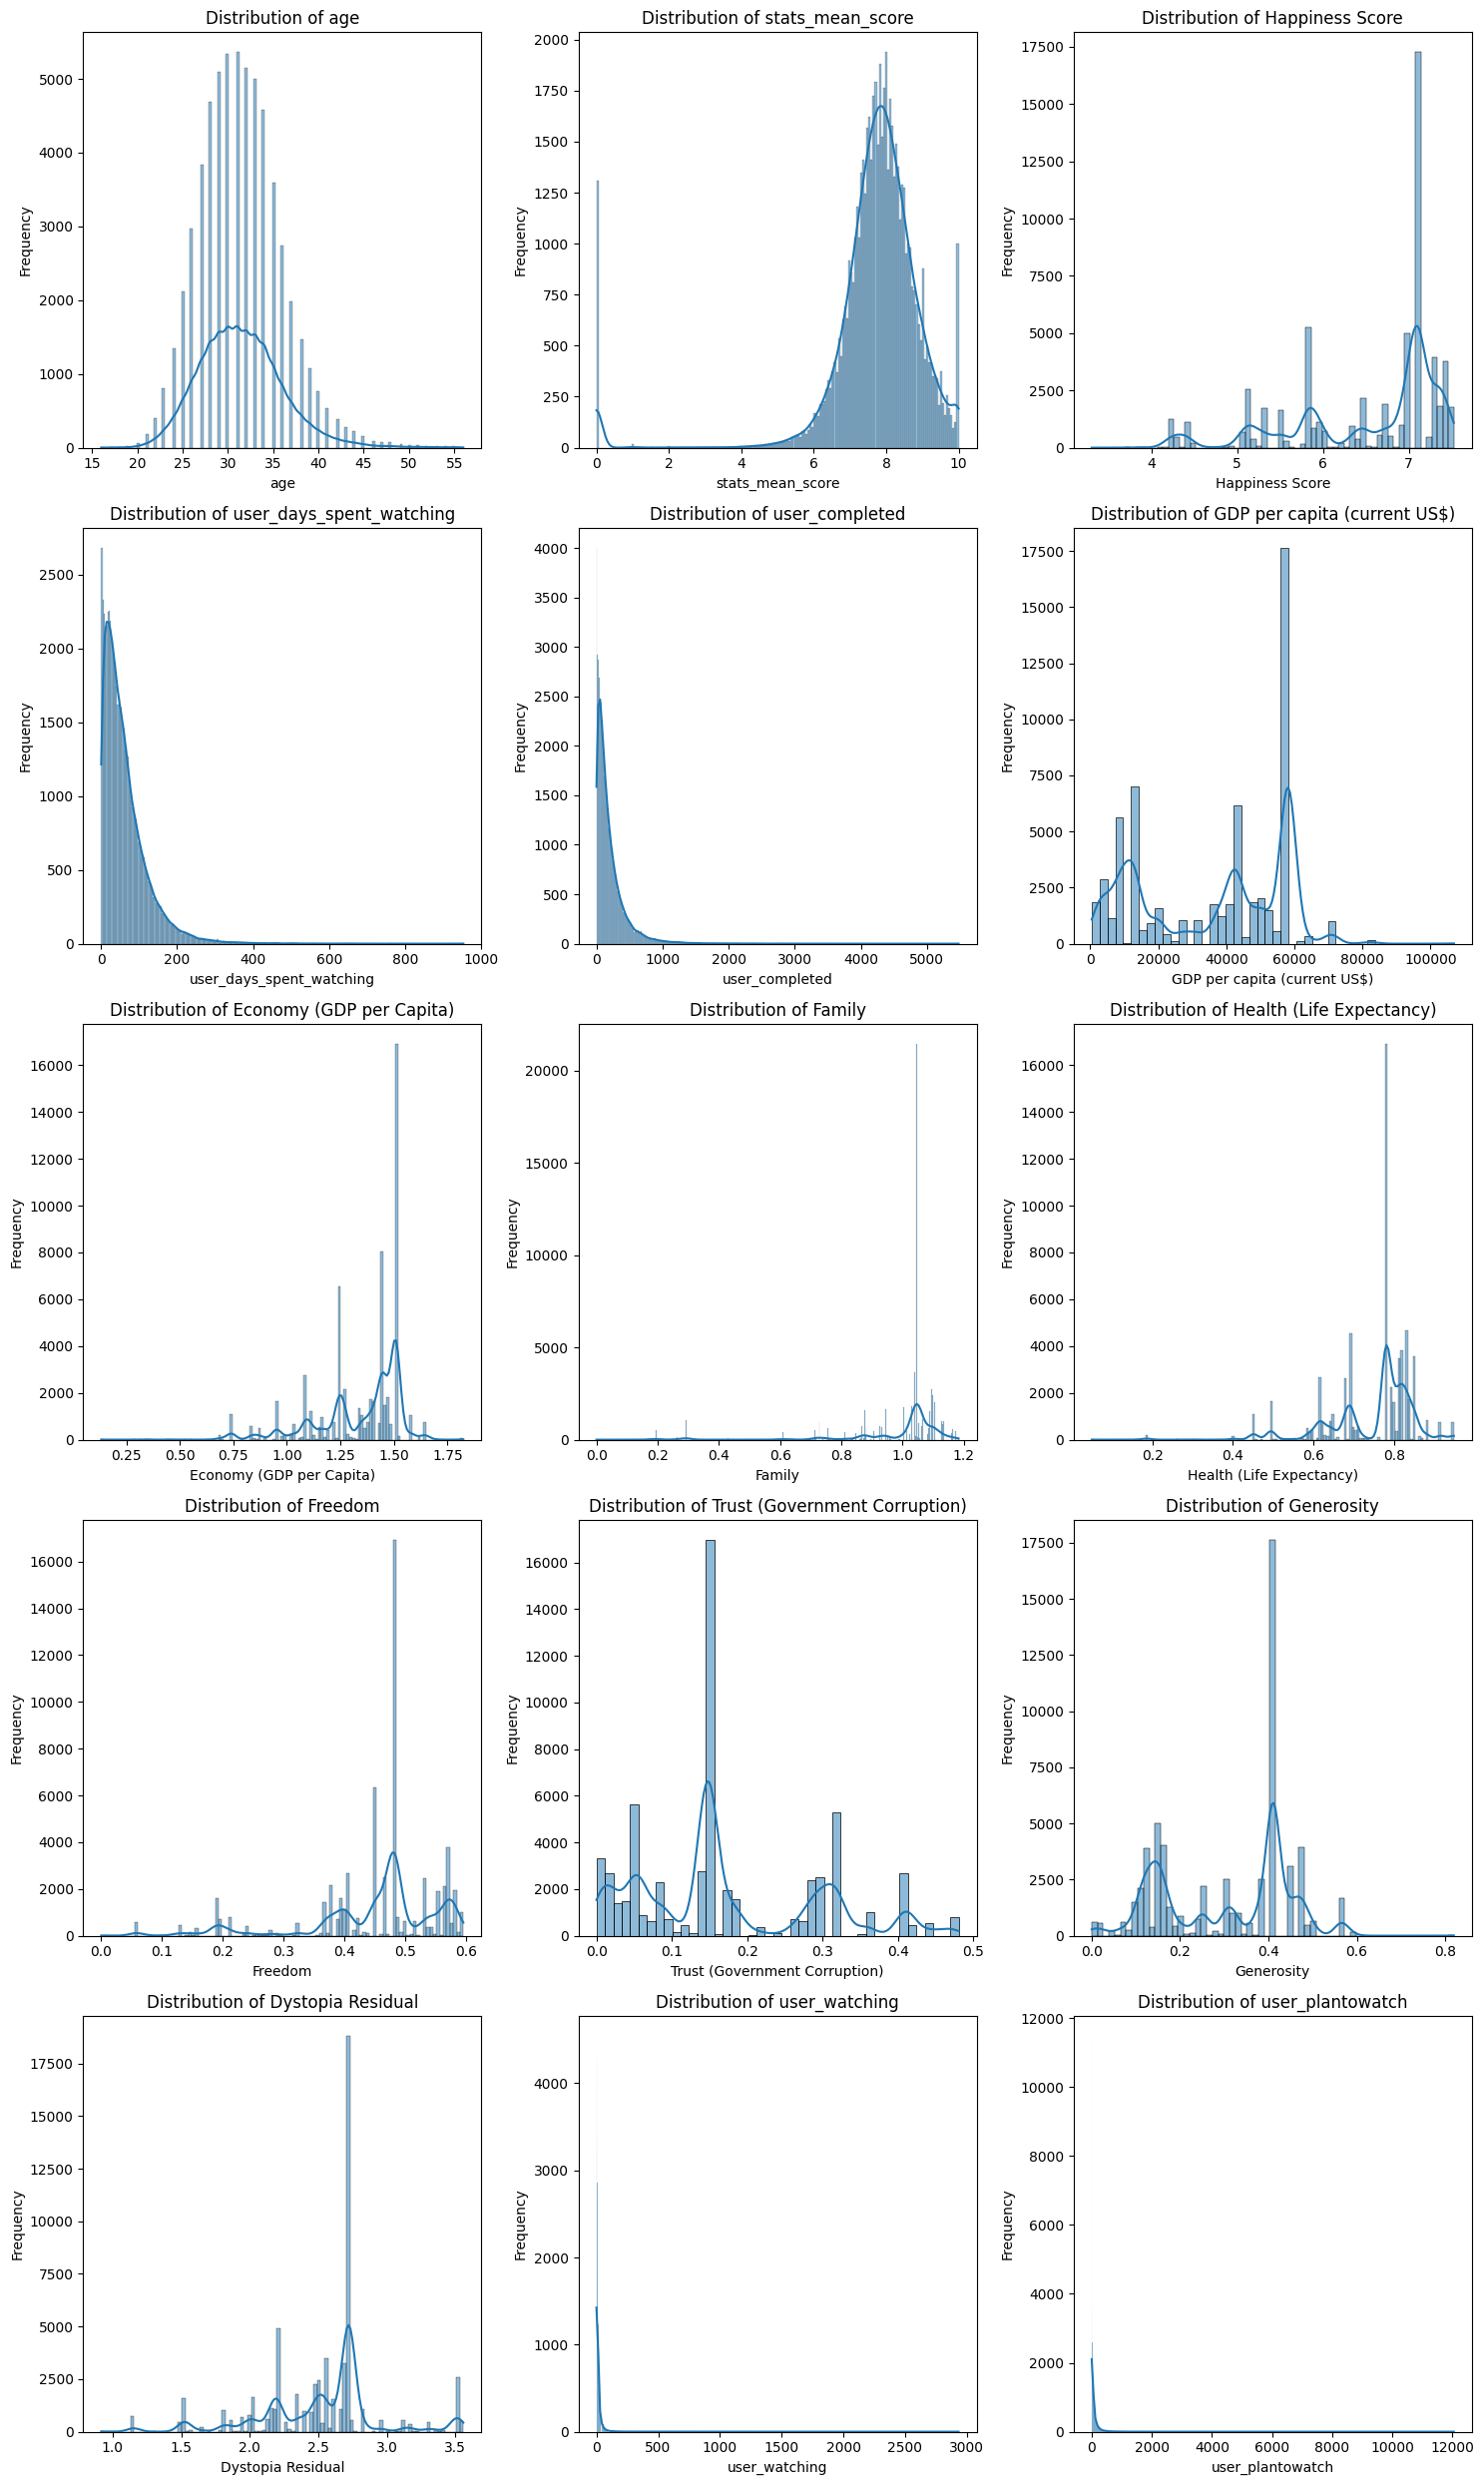

In [119]:
numerical_features = ['age',
                      'stats_mean_score',
                      'Happiness Score',
                      'user_days_spent_watching',
                      'user_completed',
                      'GDP per capita (current US$)',
                      'Economy (GDP per Capita)',
                      'Family',
                      'Health (Life Expectancy)',
                      'Freedom',
                      'Trust (Government Corruption)',
                      'Generosity',
                      'Dystopia Residual',
                      'user_watching',
                      'user_plantowatch']

num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(final_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

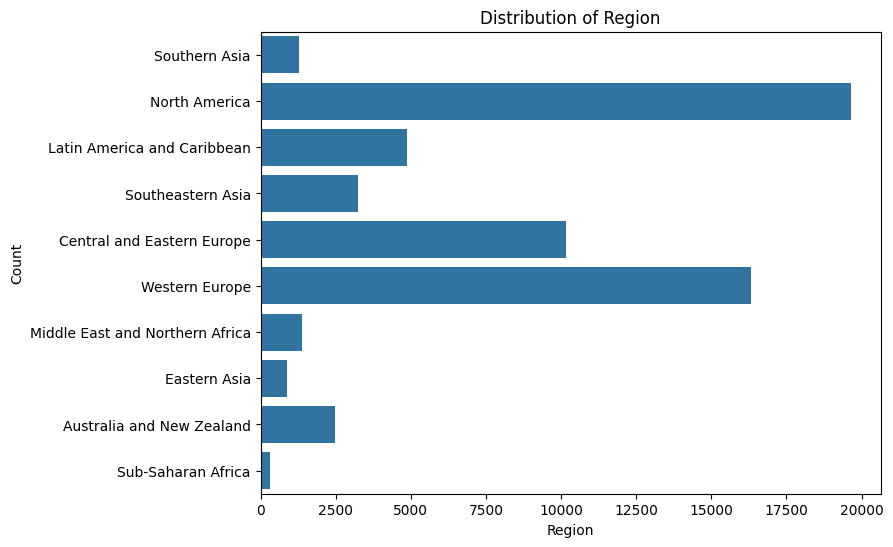

In [120]:
categorical_feature = 'Region'

plt.figure(figsize=(8, 6))
sns.countplot(y=categorical_feature, data=final_df, orient="Horizontal")
plt.title(f'Distribution of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.show()

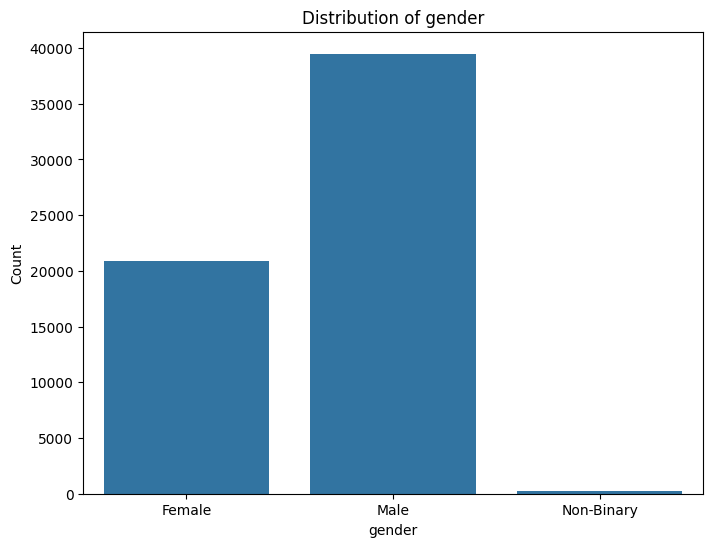

In [121]:
categorical_feature = 'gender'

plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_feature, data=final_df)
plt.title(f'Distribution of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.show()

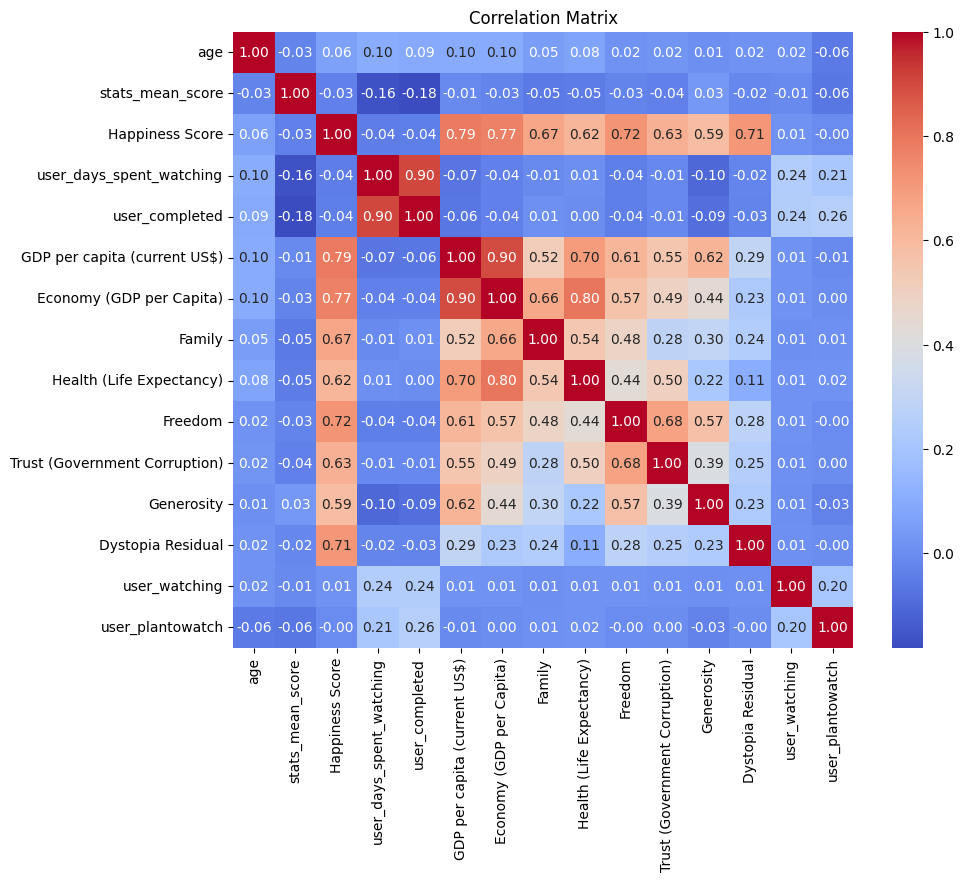

In [122]:
correlation_matrix = final_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

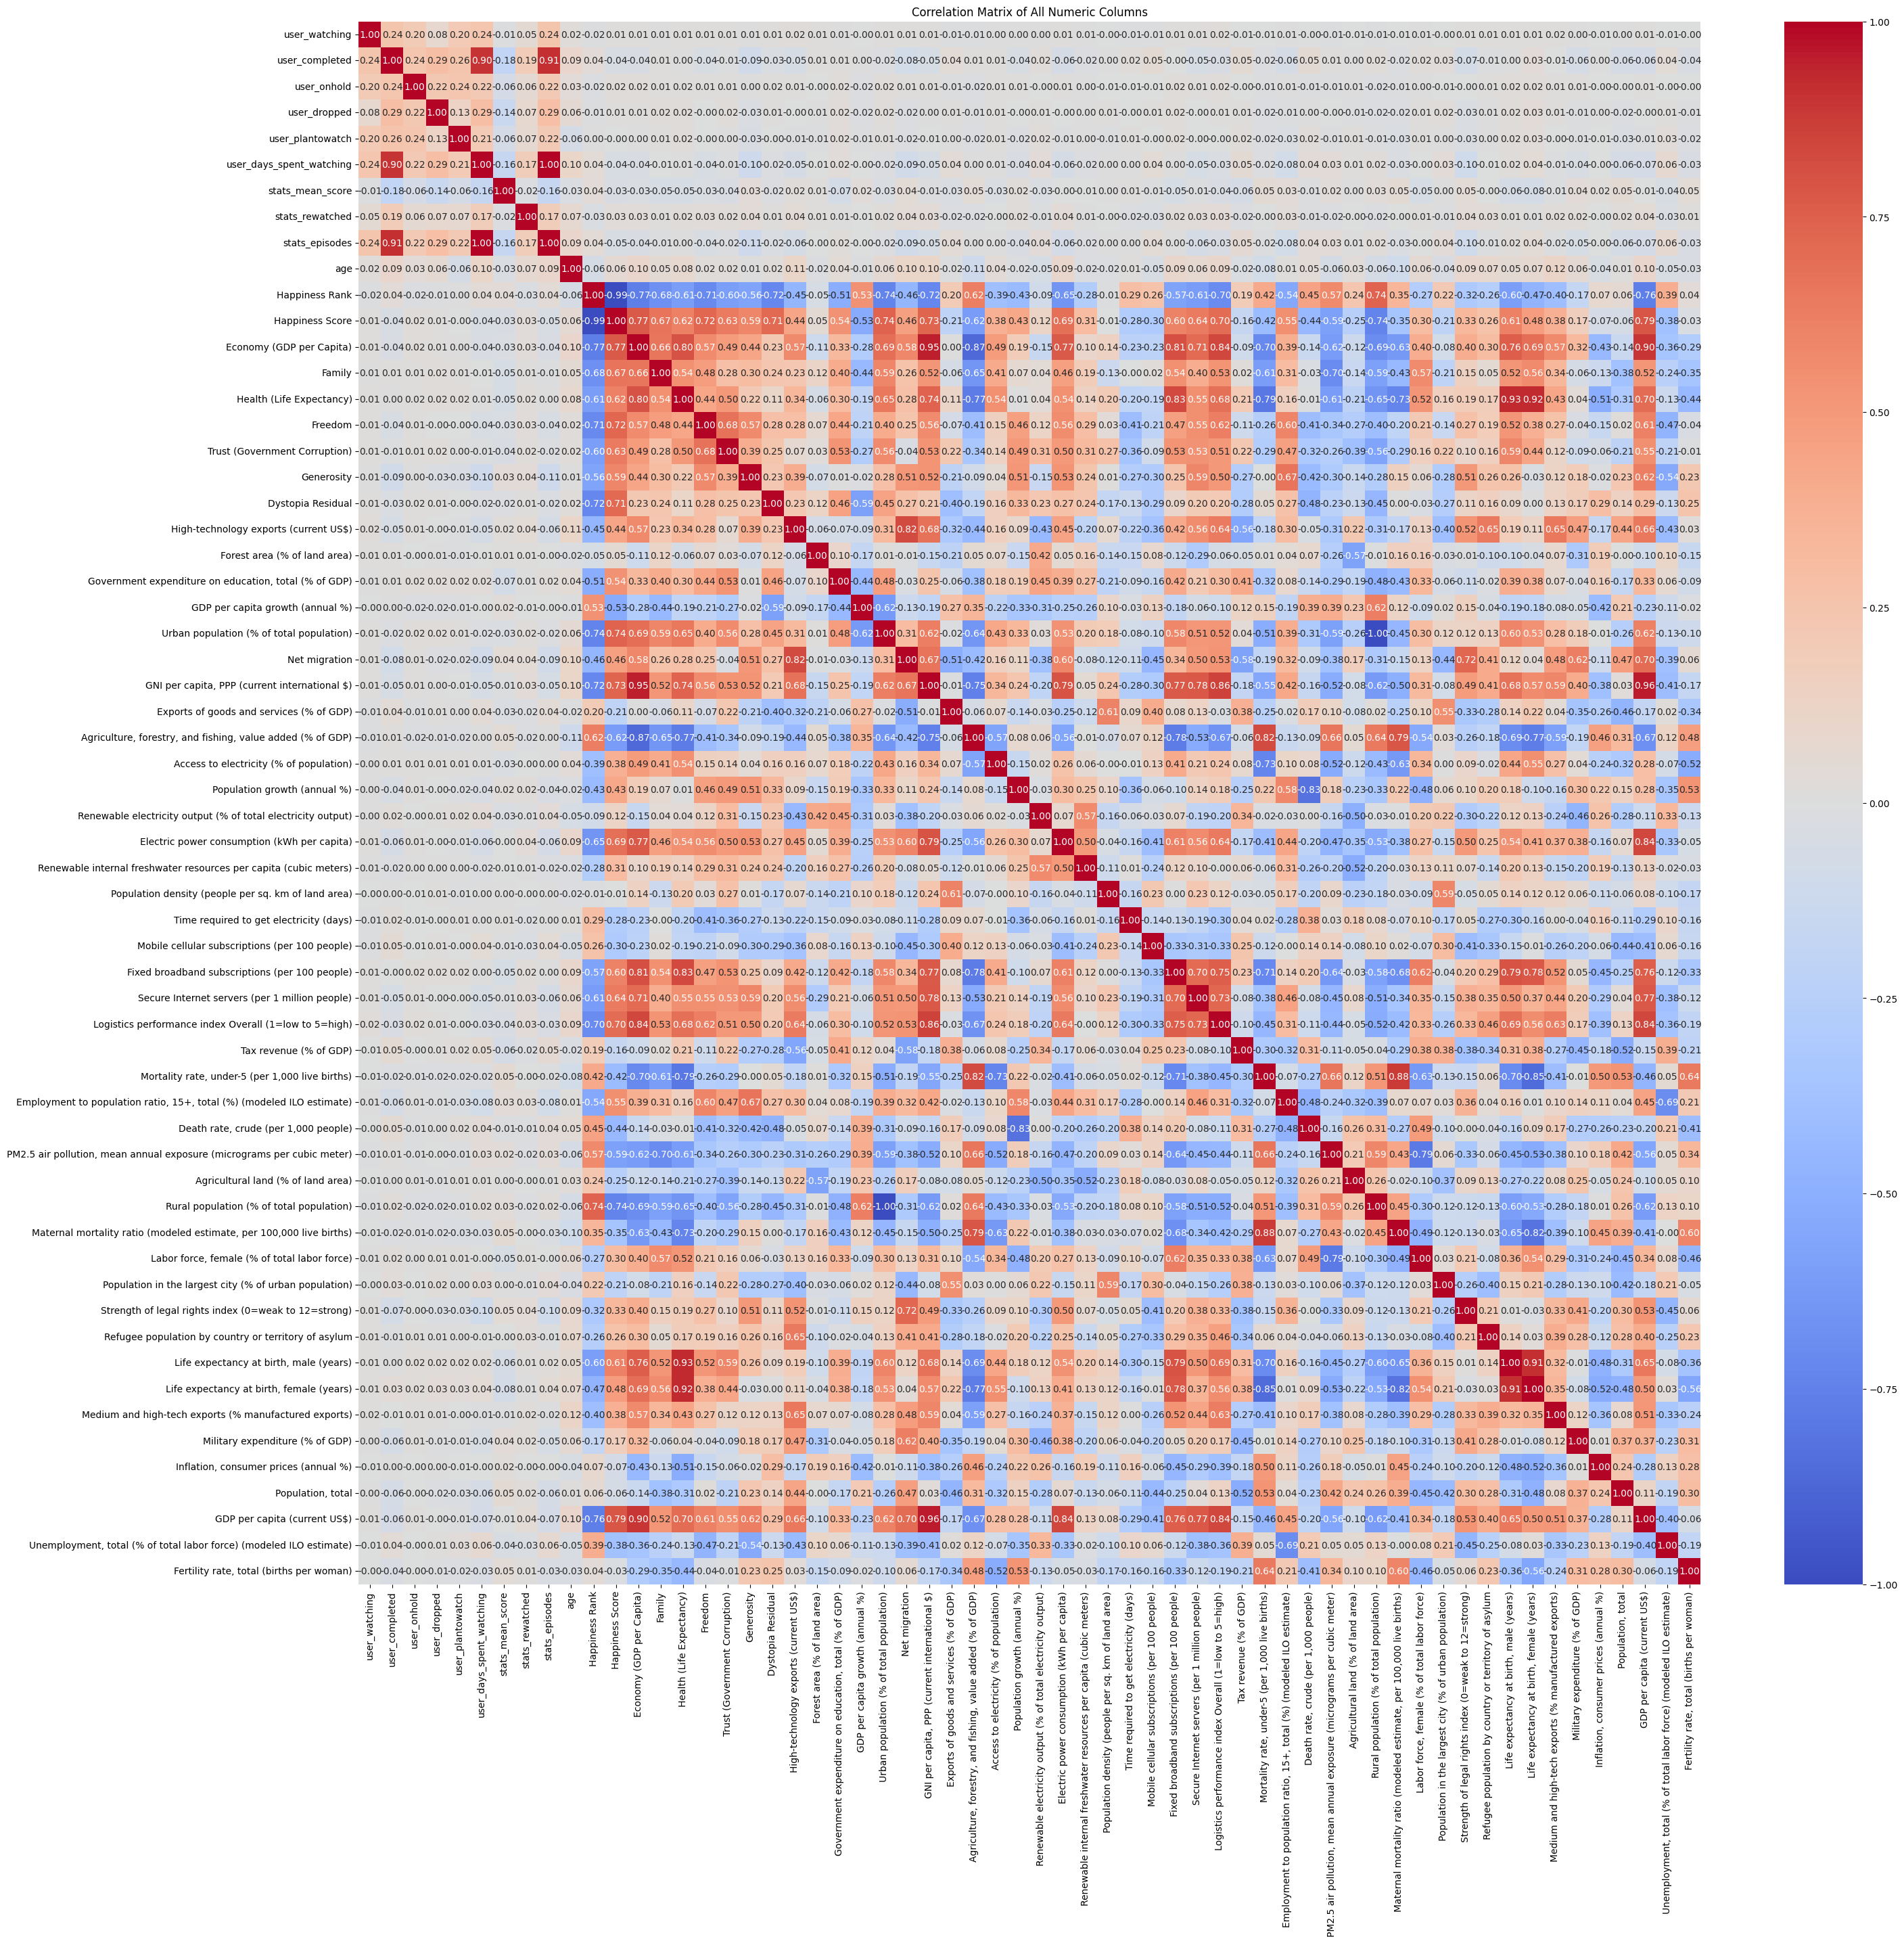

In [123]:
numeric_columns = final_df.select_dtypes(include=[np.number]).columns

correlation_matrix = final_df[numeric_columns].corr()

plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()

# Hypothesis Tests

**H1**: Users with a higher 'Mean Score' tend to have higher engagement metrics, such as a larger number of 'User Completed' anime and more 'User Days Spent Watching', suggesting satisfaction leads to deeper engagement

In [124]:
correlation_with_completed = final_df['stats_mean_score'].corr(final_df['user_completed'])
correlation_with_days_spent = final_df['stats_mean_score'].corr(final_df['user_days_spent_watching'])

print(f"Correlation between Mean Score and User Completed: {correlation_with_completed}")
print(f"Correlation between Mean Score and User Days Spent Watching: {correlation_with_days_spent}")

Correlation between Mean Score and User Completed: -0.18141397210831964
Correlation between Mean Score and User Days Spent Watching: -0.16358432691604544


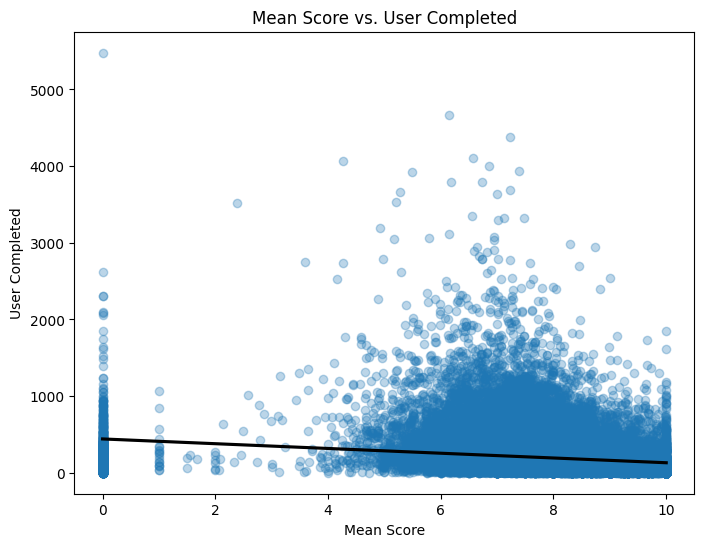

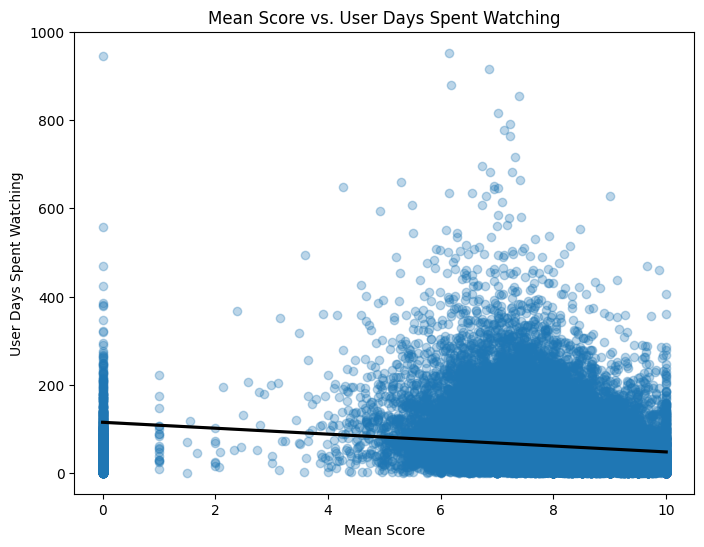

In [153]:
# Scatter plot for Mean Score vs. User Completed with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_completed', data=final_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Completed')
plt.xlabel('Mean Score')
plt.ylabel('User Completed')
plt.show()

# Scatter plot for Mean Score vs. User Days Spent Watching with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_days_spent_watching', data=final_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Days Spent Watching')
plt.xlabel('Mean Score')
plt.ylabel('User Days Spent Watching')
plt.show()

In [126]:
tmp = final_df.copy()

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

# Discretize 'user_completed' into categories (e.g., low, medium, high)
tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])

# Discretize 'user_days_spent_watching' into categories (e.g., low, medium, high)
tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

In [127]:
# Contingency table for 'mean_score_category' and 'completed_category'
contingency_table_completed = pd.crosstab(tmp['mean_score_category'], tmp['completed_category'])

# Contingency table for 'mean_score_category' and 'days_spent_category'
contingency_table_days_spent = pd.crosstab(tmp['mean_score_category'], tmp['days_spent_category'])

In [128]:
# Chi-square test for 'mean_score_category' and 'completed_category'
chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

# Chi-square test for 'mean_score_category' and 'days_spent_category'
chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

print(f"Chi-square test for Mean Score and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for Mean Score and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

Chi-square test for Mean Score and User Completed:
Chi-square statistic: 5710.284741911949
P-value: 0.0

Chi-square test for Mean Score and User Days Spent Watching:
Chi-square statistic: 4444.467921802063
P-value: 0.0


In [150]:
# Divide data based on median mean score
median_mean_score = final_df['stats_mean_score'].median()
group_high_mean_score = final_df[final_df['stats_mean_score'] > median_mean_score]
group_low_mean_score = final_df[final_df['stats_mean_score'] <= median_mean_score]

# T-test for User Completed
t_stat_completed, p_val_completed = stats.ttest_ind(
    group_high_mean_score['user_completed'], group_low_mean_score['user_completed']
)
print(f"T-test for User Completed: t-statistic = {t_stat_completed}, p-value = {p_val_completed}")

# T-test for User Days Spent Watching
t_stat_days_spent, p_val_days_spent = stats.ttest_ind(
    group_high_mean_score['user_days_spent_watching'], group_low_mean_score['user_days_spent_watching']
)
print(f"T-test for User Days Spent Watching: t-statistic = {t_stat_days_spent}, p-value = {p_val_days_spent}")

T-test for User Completed: t-statistic = -58.69546263110611, p-value = 0.0
T-test for User Days Spent Watching: t-statistic = -57.02194841787022, p-value = 0.0


**Conclusion**: We reject the null hypothesis and conclude that there is a significant association

**H2**: Users from countries with higher 'GDP per capita (current US$)' tend to watch more anime ('User Completed', 'User Watched Episodes') and potentially have higher 'Mean Scores', possibly reflecting better access or more leisure time/income.

In [139]:
correlation_with_completed = final_df['GDP per capita (current US$)'].corr(final_df['user_completed'])
correlation_with_days_spent = final_df['GDP per capita (current US$)'].corr(final_df['user_days_spent_watching'])
correlation_with_mean_score = final_df['GDP per capita (current US$)'].corr(final_df['stats_mean_score'])

print(f"Correlation between GDP per capita and User Completed: {correlation_with_completed}")
print(f"Correlation between GDP per capita and User Days Spent Watching: {correlation_with_days_spent}")
print(f"Correlation between GDP per capita and Mean Score: {correlation_with_mean_score}")

Correlation between GDP per capita and User Completed: -0.06463145359342957
Correlation between GDP per capita and User Days Spent Watching: -0.06606462455342825
Correlation between GDP per capita and Mean Score: -0.0075477876486730894


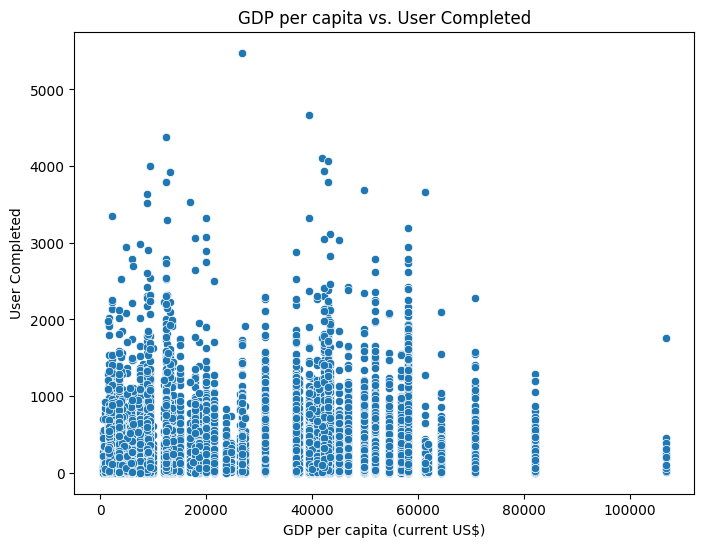

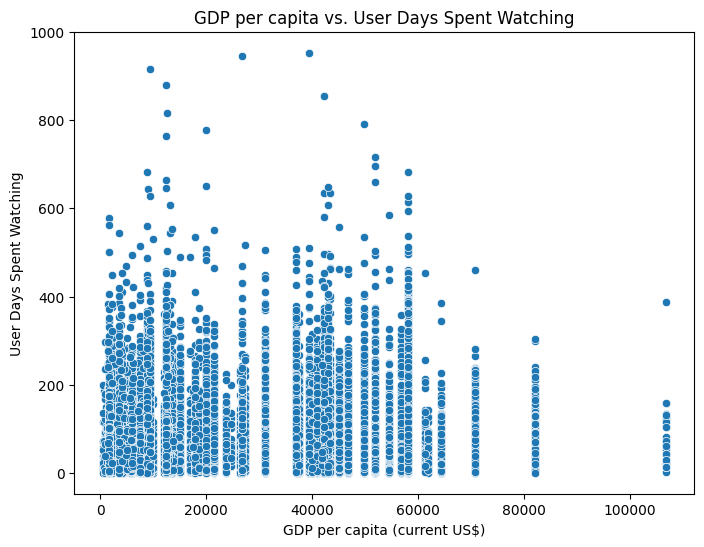

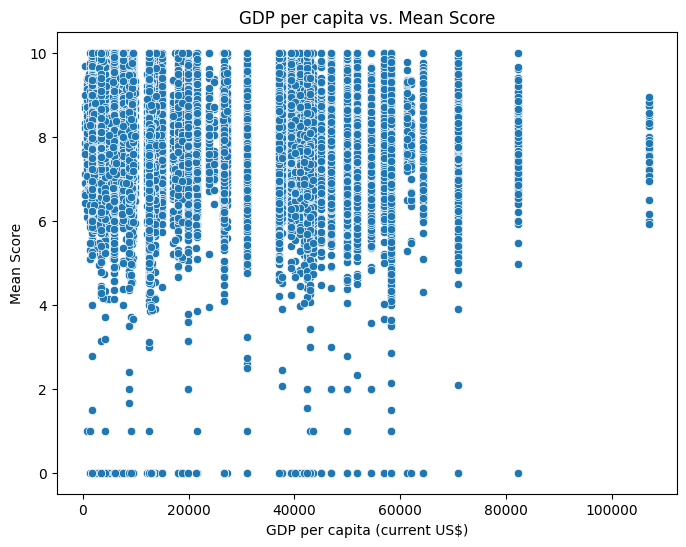

In [140]:
# Scatter plot for GDP per capita vs. User Completed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='user_completed', data=final_df)
plt.title('GDP per capita vs. User Completed')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Completed')
plt.show()

# Scatter plot for GDP per capita vs. User Days Spent Watching
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='user_days_spent_watching', data=final_df)
plt.title('GDP per capita vs. User Days Spent Watching')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Days Spent Watching')
plt.show()

# Scatter plot for GDP per capita vs. Mean Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='stats_mean_score', data=final_df)
plt.title('GDP per capita vs. Mean Score')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Mean Score')
plt.show()

In [141]:
tmp = final_df.copy()

# Discretize 'GDP per capita (current US$)' into categories (e.g., low, medium, high)
tmp['gdp_category'] = pd.qcut(tmp['GDP per capita (current US$)'], 3, labels=['low', 'medium', 'high'])

# Discretize 'user_completed' into categories (e.g., low, medium, high)
tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])

# Discretize 'user_days_spent_watching' (proxy for watched episodes) into categories
tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

# Discretize 'stats_mean_score' into categories (e.g., low, medium, high)
tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

In [142]:
# Contingency table for 'gdp_category' and 'completed_category'
contingency_table_completed = pd.crosstab(tmp['gdp_category'], tmp['completed_category'])

# Contingency table for 'gdp_category' and 'days_spent_category'
contingency_table_days_spent = pd.crosstab(tmp['gdp_category'], tmp['days_spent_category'])

# Contingency table for 'gdp_category' and 'mean_score_category'
contingency_table_mean_score = pd.crosstab(tmp['gdp_category'], tmp['mean_score_category'])

In [143]:
from scipy.stats import chi2_contingency

# Chi-square test for 'gdp_category' and 'completed_category'
chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

# Chi-square test for 'gdp_category' and 'days_spent_category'
chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

# Chi-square test for 'gdp_category' and 'mean_score_category'
chi2_stat_mean_score, p_val_mean_score, dof_mean_score, expected_mean_score = chi2_contingency(contingency_table_mean_score)

# Print the results
print(f"Chi-square test for GDP and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for GDP and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

print(f"\nChi-square test for GDP and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_mean_score}")
print(f"P-value: {p_val_mean_score}")

Chi-square test for GDP and User Completed:
Chi-square statistic: 732.7482944709107
P-value: 2.823827313381796e-157

Chi-square test for GDP and User Days Spent Watching:
Chi-square statistic: 711.4255599297197
P-value: 1.1700951733990272e-152

Chi-square test for GDP and Mean Score:
Chi-square statistic: 644.2865568104922
P-value: 4.021119068712986e-138


**Conclusion**: We reject the null hypothesis and conclude that there is a significant association